# Parse PATH monthly ridership PDF
```bash
papermill -p year $year [-p last_month $last_month] monthly.ipynb out/monthly-$year.ipynb
```

In [1]:
from utz import *
import json
from tabula import read_pdf

In [2]:
n = now()
cur_year = n.year
cur_month = n.month
cur_year, cur_month

(2024, 4)

Papermill parameters:

In [3]:
year = None
last_month = None
template = None

In [4]:
# Parameters
year = 2023
template = "2023-PATH-Monthly-Ridership-Report.tabula-template.json"


In [5]:
if year is None:
    year = cur_year

if last_month is None:
    if year == cur_year:
        last_moonth = 1
    else:
        last_month = 12

if template is None:
    template = 'PATH-Monthly-Ridership-Report.json'

In [6]:
pdf = f'data/{year}-PATH-Monthly-Ridership-Report.pdf'
pdf

'data/2023-PATH-Monthly-Ridership-Report.pdf'

In [7]:
with open(f'templates/{template}', 'r') as f:
    rects = json.load(f)
rects

[{'page': 1,
  'extraction_method': 'guess',
  'x1': 54.315,
  'x2': 577.575,
  'y1': 116.00001000000002,
  'y2': 238.40001,
  'width': 523.26,
  'height': 122.4},
 {'page': 1,
  'extraction_method': 'guess',
  'x1': 58.14,
  'x2': 577.575,
  'y1': 253.000035,
  'y2': 401.41003500000005,
  'width': 519.4350000000001,
  'height': 148.41},
 {'page': 1,
  'extraction_method': 'guess',
  'x1': 58.14,
  'x2': 577.575,
  'y1': 474.999975,
  'y2': 592.809975,
  'width': 519.4350000000001,
  'height': 117.81},
 {'page': 1,
  'extraction_method': 'guess',
  'x1': 56.61,
  'x2': 578.34,
  'y1': 611.000145,
  'y2': 753.290145,
  'width': 521.73,
  'height': 142.29}]

In [8]:
area = [ [ r[k] for k in [ 'y1', 'x1', 'y2', 'x2' ] ] for r in rects ]
area

[[116.00001000000002, 54.315, 238.40001, 577.575],
 [253.000035, 58.14, 401.41003500000005, 577.575],
 [474.999975, 58.14, 592.809975, 577.575],
 [611.000145, 56.61, 753.290145, 578.34]]

In [9]:
tables = {
    month: read_pdf(
        pdf,
        pages=month,
        area=area,
        pandas_options={'header': None},
        stream=True,
    ) 
    for month in range(1, last_month + 1)
}

tables

{1: [                    0          1       2       3       4       5
  0  Christopher Street     87,112   3,063   2,887   2,104   1,895
  1          9th Street     76,151   2,712   2,419   1,805   1,607
  2         14th Street    133,421   4,939   3,645   2,879   2,835
  3         23rd Street    125,009   5,117   2,406   1,765   2,113
  4         33rd Street    453,342  17,307  10,483   9,125   9,824
  5     UPTOWN SUBTOTAL    875,035  33,137  21,840  17,677  18,274
  6                 WTC    808,510  33,019  14,558  12,232  14,373
  7   NEW YORK SUBTOTAL  1,683,545  66,156  36,398  29,909  32,647,
                       0          1        2       3       4       5
  0               Newark    320,909   13,319   5,288   4,178   6,247
  1             Harrison    120,285    4,939   2,216   1,599   2,325
  2       Journal Square    416,924   16,114   9,731   7,336   9,516
  3         Grove Street    343,048   13,039   9,449   6,267   6,573
  4       Exchange Place    187,080    7,694   3

In [10]:
cols1 = [ 'station', 'total', 'avg weekday', 'avg sat', 'avg sun', 'avg holiday' ]
cols2 = [ 'station', 'avg daily', 'total weekday', 'total sat', 'total sun', 'total holiday' ]

In [11]:
for k, v in tables.items():
    n = len(v)
    msg = f'Pg {k}: {n} tables'
    if n == 4:
        print(msg)
    else:
        err(msg)
len(tables)

Pg 1: 4 tables
Pg 2: 4 tables
Pg 3: 4 tables
Pg 4: 4 tables
Pg 5: 4 tables
Pg 6: 4 tables
Pg 7: 4 tables
Pg 8: 4 tables
Pg 9: 4 tables
Pg 10: 4 tables
Pg 11: 4 tables
Pg 12: 4 tables


12

In [12]:
avgs = pd.concat([
    df.assign(date=to_dt(f'{year}-{month}'))
    for month, dfs in tables.items()
    for df in dfs[:2]
])
avgs

,0,1,2,3,4,5,date
0,Christopher Street,"87,112","3,063","2,887","2,104","1,895",2023-01-01
1,9th Street,"76,151","2,712","2,419","1,805","1,607",2023-01-01
2,14th Street,"133,421","4,939","3,645","2,879","2,835",2023-01-01
3,23rd Street,"125,009","5,117","2,406","1,765","2,113",2023-01-01
4,33rd Street,"453,342","17,307","10,483","9,125","9,824",2023-01-01
...,...,...,...,...,...,...,...
4,Exchange Place,"230,549","8,965","5,838","3,648","3,822",2023-12-01
5,Newport,"281,672","10,984","7,248","4,311","4,188",2023-12-01
6,Hoboken,"407,052","15,758","11,696","5,994","3,443",2023-12-01
7,NEW JERSEY SUBTOTAL,"2,297,662","88,690","61,357","36,828","32,937",2023-12-01


In [13]:
avgs.columns = cols1 + ['month']
avgs = avgs.assign(**{
    k: avgs[k].astype(str).str.replace(',', '').astype(int)
    for k in cols1[1:]
})
avgs

,station,total,avg weekday,avg sat,avg sun,avg holiday,month
0,Christopher Street,87112,3063,2887,2104,1895,2023-01-01
1,9th Street,76151,2712,2419,1805,1607,2023-01-01
2,14th Street,133421,4939,3645,2879,2835,2023-01-01
3,23rd Street,125009,5117,2406,1765,2113,2023-01-01
4,33rd Street,453342,17307,10483,9125,9824,2023-01-01
...,...,...,...,...,...,...,...
4,Exchange Place,230549,8965,5838,3648,3822,2023-12-01
5,Newport,281672,10984,7248,4311,4188,2023-12-01
6,Hoboken,407052,15758,11696,5994,3443,2023-12-01
7,NEW JERSEY SUBTOTAL,2297662,88690,61357,36828,32937,2023-12-01


In [14]:
avgs.isna().sum(axis=0)

station        0
total          0
avg weekday    0
avg sat        0
avg sun        0
avg holiday    0
month          0
dtype: int64

In [15]:
avgs.dtypes

station                object
total                   int64
avg weekday             int64
avg sat                 int64
avg sun                 int64
avg holiday             int64
month          datetime64[ns]
dtype: object

In [16]:
sums = pd.concat([
    df.assign(date=to_dt(f'{year}-{month}'))
    for month, dfs in tables.items()
    for df in dfs[2:]
])
sums.columns = cols2 + ['month']
sums = sums.assign(**{
    k: sums[k].astype(str).str.replace(',', '').astype(int)
    for k in cols2[1:]
})
sums

,station,avg daily,total weekday,total sat,total sun,total holiday,month
0,Christopher Street,2810,61258,11546,10518,3790,2023-01-01
1,9th Street,2456,54235,9677,9025,3214,2023-01-01
2,14th Street,4304,98776,14578,14397,5670,2023-01-01
3,23rd Street,4033,102336,9625,8823,4225,2023-01-01
4,33rd Street,14624,346138,41933,45623,19648,2023-01-01
...,...,...,...,...,...,...,...
4,Exchange Place,7437,179294,29191,18242,3822,2023-12-01
5,Newport,9086,219689,36239,21556,4188,2023-12-01
6,Hoboken,13131,315161,58480,29968,3443,2023-12-01
7,NEW JERSEY SUBTOTAL,74118,1773799,306785,184141,32937,2023-12-01


In [17]:
sums.isna().sum(axis=0)

station          0
avg daily        0
total weekday    0
total sat        0
total sun        0
total holiday    0
month            0
dtype: int64

In [18]:
sums.dtypes

station                  object
avg daily                 int64
total weekday             int64
total sat                 int64
total sun                 int64
total holiday             int64
month            datetime64[ns]
dtype: object

In [19]:
df = sxs(
    avgs.set_index(['month', 'station']),
    sums.set_index(['month', 'station']),
)
df = df[[cols2[1]] + cols1[2:] + [cols1[1]] + cols2[2:]]
df

avg daily  avg weekday  avg sat  avg sun  \
month      station                                                         
2023-01-01 Christopher Street        2810         3063     2887     2104   
           9th Street                2456         2712     2419     1805   
           14th Street               4304         4939     3645     2879   
           23rd Street               4033         5117     2406     1765   
           33rd Street              14624        17307    10483     9125   
...                                   ...          ...      ...      ...   
2023-12-01 Exchange Place            7437         8965     5838     3648   
           Newport                   9086        10984     7248     4311   
           Hoboken                  13131        15758    11696     5994   
           NEW JERSEY SUBTOTAL      74118        88690    61357    36828   
           MONTHLY TOTAL           134639       160301   111635    69503   

                                avg holiday    total  total weekday  \
month      station                                                    
2023-01-01 Christopher Street          1895    87112          61258   
           9th Street                  1607    76151          54235   
           14th Street                 2835   133421          98776   
           23rd Street                 2113   125009         102336   
           33rd Street                 9824   453342         346138   
...                                     ...      ...            ...   
2023-12-01 Exchange Place              3822   230549         179294   
           Newport                     4188   281672         219689   
           Hoboken                     3443   407052         315161   
           NEW JERSEY SUBTOTAL        32937  2297662        1773799   
           MONTHLY TOTAL              62099  4173801        3206013   

                                total sat  total sun  total holiday  
month      station                                                   
2023-01-01 Christopher Street       11546      10518           3790  
           9th Street                9677       9025           3214  
           14th Street              14578      14397           5670  
           23rd Street               9625       8823           4225  
           33rd Street              41933      45623          19648  
...                                   ...        ...            ...  
2023-12-01 Exchange Place           29191      18242           3822  
           Newport                  36239      21556           4188  
           Hoboken                  58480      29968           3443  
           NEW JERSEY SUBTOTAL     306785     184141          32937  
           MONTHLY TOTAL           558173     347516          62099  

[204 rows x 10 columns]

In [20]:
path = f'data/{year}.pqt'
df.to_parquet(path)

In [21]:
import plotly.express as px
from IPython.display import Image

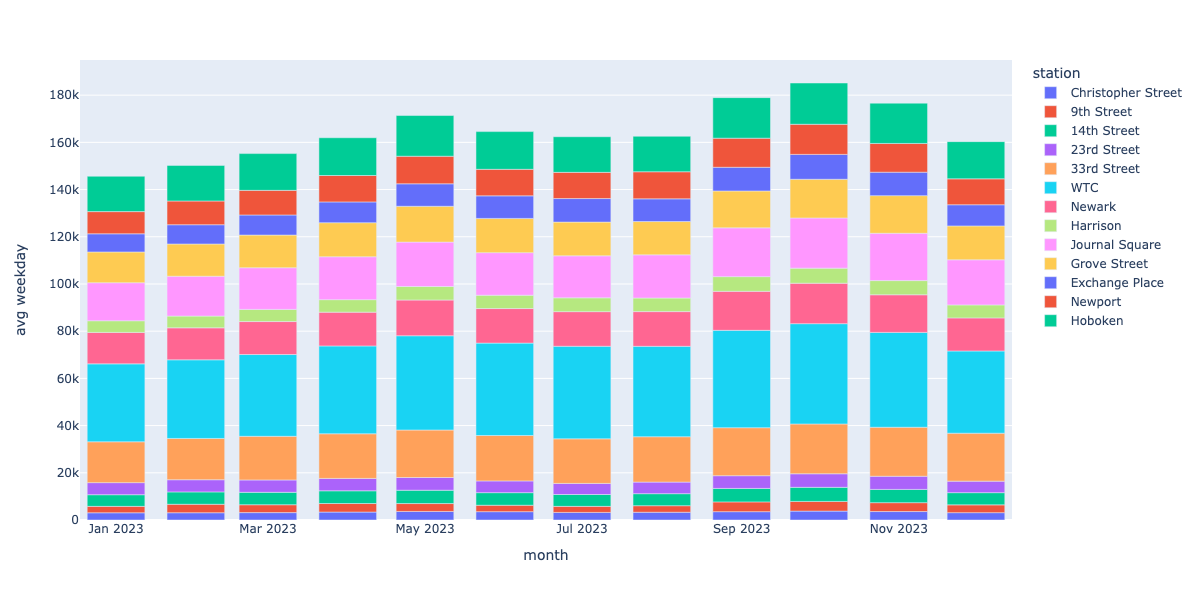

In [22]:
fig = px.bar(
    avgs[~avgs.station.str.contains('TOTAL')],
    x='month', y='avg weekday', color='station',
)
Image(fig.to_image(width=1200, height=600))